In [ ]:
#import necessary libraries

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#add the requisite URL link to a variable

In [4]:
url='https://h1bdata.info/index.php?em=&job=machine+learning%2B&city=&year=All+Years'

In [ ]:
#extract data from the URL

In [5]:
page = requests.get(url)

In [ ]:
#parse data scraped from URL

In [6]:
soup = BeautifulSoup(page.text,'html.parser')

In [ ]:
#identifying table present in scraped data. I found the class ID by inspecting the element in the webpage initially

In [7]:
table = soup.find_all(id='myTable')

In [ ]:
#converting the BeautifulSoup object to a unicode string

In [ ]:
soup.prettify()

In [ ]:
#all the data is present in the first element of the variable 'table'.
#converting each line of text that contains a td HTML tag to a new row

In [9]:
table=table[0]
raw_data =[]
for row in table.find_all('tr'):
    for cell in row.find_all('td'):
        raw_data.append(cell.text)

In [ ]:
#moved all the first elements in each row to a column 'employer'.
#performed a similar operation for job title, salary, location, start date, submit date & case status

In [10]:
employer = []
np.array(employer.append(raw_data[::7]))
employer_df = pd.DataFrame(employer)
employer_df = employer_df.transpose()

In [11]:
title = []
np.array(title.append(raw_data[1::7]))
title_df = pd.DataFrame(title)
title_df = title_df.transpose()

In [12]:
salary = []
np.array(salary.append(raw_data[2::7]))
salary_df = pd.DataFrame(salary)
salary_df = salary_df.transpose()
salary_df = salary_df[0].str.replace(",", "").astype(float)

In [13]:
location = []
np.array(location.append(raw_data[3::7]))
location_df = pd.DataFrame(location)
location_df = location_df.transpose()

In [14]:
submit_date = []
np.array(submit_date.append(raw_data[4::7]))
submit_date_df = pd.DataFrame(submit_date)
submit_date_df = submit_date_df.transpose()
submit_date_df = pd.to_datetime(submit_date_df[0])

In [15]:
start_date = []
np.array(start_date.append(raw_data[5::7]))
start_date_df = pd.DataFrame(start_date)
start_date_df = start_date_df.transpose()
start_date_df = pd.to_datetime(start_date_df[0])

In [16]:
case_status = []
np.array(case_status.append(raw_data[6::7]))
case_status_df = pd.DataFrame(case_status)
case_status_df = case_status_df.transpose()

In [ ]:
#concat all individual dataframes into different columns of a single data frame. There's definitely a better way to do this than the way I've done of using separate variable names. It will require further reading.

In [17]:
df = pd.concat([employer_df,title_df,salary_df,location_df,submit_date_df,start_date_df,case_status_df], axis=1)


In [18]:
df.head()

,0,0,0,0,0,0,0
0,DROPBOX INC,MACHINE LEARNING,122429.0,"SAN FRANCISCO, CA",2018-03-05,2018-09-01,CERTIFIED
1,GRAVITY JACK INC,MACHINE LEARNING & COMPUTER VISION ENGINEER,58500.0,"LIBERTY LAKE, WA",2018-03-21,2018-03-21,DENIED
2,GRAVITY JACK INC,MACHINE LEARNING & COMPUTER VISION ENGINEER,58500.0,"LIBERTY LAKE, WA",2018-03-26,2018-03-26,CERTIFIED
3,JETLORE INC F/K/A QWHISPR INC,MACHINE LEARNING & DATA MINING ARCHITECT,131000.0,"SAN MATEO, CA",2017-03-15,2017-09-14,CERTIFIED
4,MACHINE ZONE INC,MACHINE LEARNING & NLP DIRECTOR,169749.0,"PALO ALTO, CA",2017-03-20,2017-09-16,CERTIFIED


In [ ]:
#added column names to the dataframe

In [19]:
df.columns = ['company','position_title','salary','location','submit_date','start_date','case_status']

In [20]:
df.head()

,company,position_title,salary,location,submit_date,start_date,case_status
0,DROPBOX INC,MACHINE LEARNING,122429.0,"SAN FRANCISCO, CA",2018-03-05,2018-09-01,CERTIFIED
1,GRAVITY JACK INC,MACHINE LEARNING & COMPUTER VISION ENGINEER,58500.0,"LIBERTY LAKE, WA",2018-03-21,2018-03-21,DENIED
2,GRAVITY JACK INC,MACHINE LEARNING & COMPUTER VISION ENGINEER,58500.0,"LIBERTY LAKE, WA",2018-03-26,2018-03-26,CERTIFIED
3,JETLORE INC F/K/A QWHISPR INC,MACHINE LEARNING & DATA MINING ARCHITECT,131000.0,"SAN MATEO, CA",2017-03-15,2017-09-14,CERTIFIED
4,MACHINE ZONE INC,MACHINE LEARNING & NLP DIRECTOR,169749.0,"PALO ALTO, CA",2017-03-20,2017-09-16,CERTIFIED


In [21]:
#considering only certified LCA applications. Other applications are either withdrawn or denied.
df = df[df.case_status == 'CERTIFIED']

In [22]:
df.head()

,company,position_title,salary,location,submit_date,start_date,case_status
0,DROPBOX INC,MACHINE LEARNING,122429.0,"SAN FRANCISCO, CA",2018-03-05,2018-09-01,CERTIFIED
2,GRAVITY JACK INC,MACHINE LEARNING & COMPUTER VISION ENGINEER,58500.0,"LIBERTY LAKE, WA",2018-03-26,2018-03-26,CERTIFIED
3,JETLORE INC F/K/A QWHISPR INC,MACHINE LEARNING & DATA MINING ARCHITECT,131000.0,"SAN MATEO, CA",2017-03-15,2017-09-14,CERTIFIED
4,MACHINE ZONE INC,MACHINE LEARNING & NLP DIRECTOR,169749.0,"PALO ALTO, CA",2017-03-20,2017-09-16,CERTIFIED
5,ABNORMAL SECURITY INC,MACHINE LEARNING & USER EXPERIENCE ENGINEER,165000.0,"SAN FRANCISCO, CA",2018-04-09,2018-05-21,CERTIFIED


In [23]:
#splitting the submitdate & startdate columns with years and months for easier analysis. I'm yet to learn how to use datetime objects for time series analysis.

In [24]:
df['submitdate_year'] = pd.DatetimeIndex(df['submit_date']).year

In [25]:
df['submitdate_month'] = pd.DatetimeIndex(df['submit_date']).month

In [26]:
df['startdate_year'] = pd.DatetimeIndex(df['start_date']).year

In [27]:
df['startdate_month'] = pd.DatetimeIndex(df['start_date']).month

In [28]:
df.head()

,company,position_title,salary,location,submit_date,start_date,case_status,submitdate_year,submitdate_month,startdate_year,startdate_month
0,DROPBOX INC,MACHINE LEARNING,122429.0,"SAN FRANCISCO, CA",2018-03-05,2018-09-01,CERTIFIED,2018,3,2018,9
2,GRAVITY JACK INC,MACHINE LEARNING & COMPUTER VISION ENGINEER,58500.0,"LIBERTY LAKE, WA",2018-03-26,2018-03-26,CERTIFIED,2018,3,2018,3
3,JETLORE INC F/K/A QWHISPR INC,MACHINE LEARNING & DATA MINING ARCHITECT,131000.0,"SAN MATEO, CA",2017-03-15,2017-09-14,CERTIFIED,2017,3,2017,9
4,MACHINE ZONE INC,MACHINE LEARNING & NLP DIRECTOR,169749.0,"PALO ALTO, CA",2017-03-20,2017-09-16,CERTIFIED,2017,3,2017,9
5,ABNORMAL SECURITY INC,MACHINE LEARNING & USER EXPERIENCE ENGINEER,165000.0,"SAN FRANCISCO, CA",2018-04-09,2018-05-21,CERTIFIED,2018,4,2018,5


In [ ]:
#checking the number of applications per year.

In [29]:
df.submitdate_year.value_counts().sort_index()

2013      8
2014     31
2015     42
2016     42
2017    125
2018    242
Name: submitdate_year, dtype: int64

In [ ]:
#plotting the above data

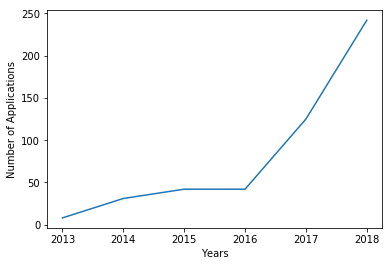

In [86]:
df.submitdate_year.value_counts().sort_index().plot()
plt.xlabel('Years')
plt.ylabel('Number of Applications')
plt.show()

In [ ]:
#calculating the mean salary for each year and trying to identify a trend through a plot. There's definitely a better way to do this than the hacky way I've done.

In [31]:
ts = [2013,2014,2015,2016,2017,2018]

year2013 = df.loc[df.submitdate_year == ts[0],:]
salary_2013 = year2013.salary.mean()

year2014 = df.loc[df.submitdate_year == ts[1],:]
salary_2014 = year2014.salary.mean()

year2015 = df.loc[df.submitdate_year == ts[2],:]
salary_2015 = year2015.salary.mean()


year2016 = df.loc[df.submitdate_year == ts[3],:]
salary_2016 = year2016.salary.mean()

year2017 = df.loc[df.submitdate_year == ts[4],:]
salary_2017 = year2017.salary.mean()


year2018 = df.loc[df.submitdate_year == ts[5],:]
salary_2018 = year2018.salary.mean()

salary = [salary_2013,salary_2014,salary_2015,salary_2016,salary_2017,salary_2018]


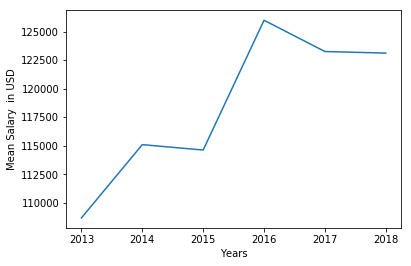

In [88]:
plt.plot(ts, salary)
plt.xlabel('Years')
plt.ylabel('Mean Salary  in USD')
plt.show()

In [ ]:
print(time)

In [44]:
df.shape

(490, 11)

In [ ]:
#finding the number of days between application submission date and job start date.

In [58]:
average_days = []
i = 0
for i, row in df.iterrows():
    x = pd.Timedelta(df['start_date'][i] - df['submit_date'][i]).days
    average_days.append(x)
    i += 1


In [61]:
len(average_days)

490

In [62]:
average_days = pd.DataFrame(average_days)

In [63]:
df['days_between_submission_and_start'] = average_days

In [64]:
df.head()

,company,position_title,salary,location,submit_date,start_date,case_status,submitdate_year,submitdate_month,startdate_year,startdate_month,days_between_submission_and_start
0,DROPBOX INC,MACHINE LEARNING,122429.0,"SAN FRANCISCO, CA",2018-03-05,2018-09-01,CERTIFIED,2018,3,2018,9,180.0
2,GRAVITY JACK INC,MACHINE LEARNING & COMPUTER VISION ENGINEER,58500.0,"LIBERTY LAKE, WA",2018-03-26,2018-03-26,CERTIFIED,2018,3,2018,3,183.0
3,JETLORE INC F/K/A QWHISPR INC,MACHINE LEARNING & DATA MINING ARCHITECT,131000.0,"SAN MATEO, CA",2017-03-15,2017-09-14,CERTIFIED,2017,3,2017,9,180.0
4,MACHINE ZONE INC,MACHINE LEARNING & NLP DIRECTOR,169749.0,"PALO ALTO, CA",2017-03-20,2017-09-16,CERTIFIED,2017,3,2017,9,42.0
5,ABNORMAL SECURITY INC,MACHINE LEARNING & USER EXPERIENCE ENGINEER,165000.0,"SAN FRANCISCO, CA",2018-04-09,2018-05-21,CERTIFIED,2018,4,2018,5,28.0


In [ ]:
#find it for all years and plotting

In [66]:
year2013 = df.loc[df.submitdate_year == ts[0],:]
year2014 = df.loc[df.submitdate_year == ts[1],:]
year2015 = df.loc[df.submitdate_year == ts[2],:]
year2016 = df.loc[df.submitdate_year == ts[3],:]
year2017 = df.loc[df.submitdate_year == ts[4],:]
year2018 = df.loc[df.submitdate_year == ts[5],:]


days_2013 = year2013.days_between_submission_and_start.mean()
days_2014 = year2014.days_between_submission_and_start.mean()
days_2015 = year2015.days_between_submission_and_start.mean()
days_2016 = year2016.days_between_submission_and_start.mean()
days_2017 = year2017.days_between_submission_and_start.mean()
days_2018 = year2018.days_between_submission_and_start.mean()

days_difference = [days_2013,days_2014,days_2015,days_2016,days_2017,days_2018]

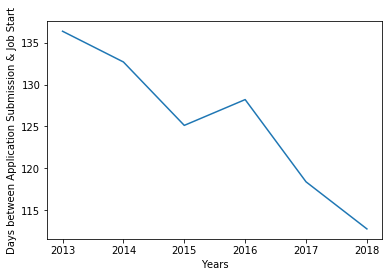

In [90]:
plt.plot(ts, days_difference)
plt.xlabel('Years')
plt.ylabel('Days between Application Submission & Job Start')
plt.show()

In [ ]:
#looks like there's a significant drop in the number of days. One can assume confidently that employers want these hires to start earlier as the job market for ML engineers keeps getting hotter.

In [81]:
#most common month for submission, ideally in march since USCIS only accepts new applications in the first week of April every year.
df.submitdate_month.mode()

0    3
dtype: int64

In [82]:
#seems like most start dates are in the month of September. Could be because many students graduate at the end of spring and it takes between 60-90 days for USCIS to process applications and job offers are provided in the previous year itself.
df.startdate_month.mode()


0    9
dtype: int64